In [3]:
pip install pandas matplotlib seaborn statsmodels

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [4]:
df = pd.read_excel('/Users/21car/Downloads/Survey 24.xlsx')

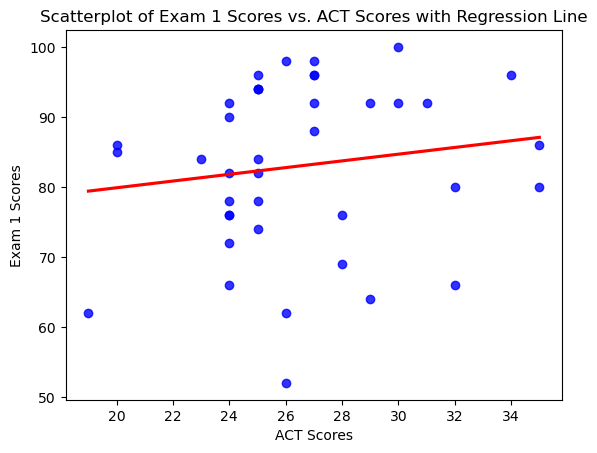

In [7]:
sns.regplot(x='ACT', y='Exam1', data=df, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('ACT Scores')
plt.ylabel('Exam 1 Scores')
plt.title('Scatterplot of Exam 1 Scores vs. ACT Scores with Regression Line')
plt.show()

In [6]:
import statsmodels.api as sm

# Prepare the data for regression
X = df['ACT']  # Predictor
y = df['Exam1']  # Response
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Exam1   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8604
Date:                Wed, 24 Apr 2024   Prob (F-statistic):              0.359
Time:                        12:59:47   Log-Likelihood:                -155.42
No. Observations:                  40   AIC:                             314.8
Df Residuals:                      38   BIC:                             318.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.2839     13.841      5.078      0.0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
df = pd.read_excel('Survey 24.xlsx')

# Check for missing values and handle them
df.dropna(subset=['Exam1', 'OGPA', 'SGPA', 'StartStudy'], inplace=True)

# Features and target
X = df[['Exam1', 'OGPA', 'SGPA']]
y = df['StartStudy']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

C:\Users\21car\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          62       0.00      0.00      0.00         0
          66       0.00      0.00      0.00         1
          69       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         0
          78       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         1
          85       0.00      0.00      0.00         1
          90       0.00      0.00      0.00         1
          92       0.25      1.00      0.40         1
          94       0.00      0.00      0.00         1
          96       0.00      0.00      0.00         2
          98       0.00      0.00      0.00         1

    accuracy                           0.08        12
   macro avg       0.02      0.08      0.03        12
weighted avg       0.02      0.08      0.03        12

[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1

C:\Users\21car\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\21car\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\21car\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\21car\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [13]:
# Convert to float, handling errors if occur
df['Quiz Average'] = pd.to_numeric(df['Quiz Average'], errors='coerce')
df['ACT'] = pd.to_numeric(df['ACT'], errors='coerce')

# Optionally, drop rows where numeric conversion failed and resulted in NaNs
df.dropna(subset=['Quiz Average', 'ACT'], inplace=True)

In [14]:
grouped = df.groupby('GradeExam2')[['Quiz Average', 'ACT']].mean()
print(grouped)

Empty DataFrame
Columns: [Quiz Average, ACT]
Index: []


In [16]:
grade_act_avg = data.groupby("Quiz Average")["ACT"].mean().reset_index()

# Rename the columns for clarity
grade_act_avg.columns = ["Quiz Average", "Average ACT"]

# Display the table
print(grade_act_avg)

  Quiz Average  Average ACT
0      80%-90%    26.142857
1      90%-95%    25.333333
2    Above 95%    28.181818
3    Below 80%    26.666667


In [17]:
print(df.head())

# Check for missing values in relevant columns
print(df[['StartStudy', 'OGPA', 'SGPA']].isna().sum())

Empty DataFrame
Columns: [ID, Exam1, Exam2, GradeExam2, ACT, StartStudy, OGPA, SGPA, Quiz Average]
Index: []
StartStudy    0.0
OGPA          0.0
SGPA          0.0
dtype: float64


In [18]:
df.dropna(subset=['StartStudy', 'OGPA', 'SGPA'], inplace=True)

In [19]:
pivot_table = df.pivot_table(index='StartStudy', values=['OGPA', 'SGPA'], aggfunc='max')

# Display the pivot table
print(pivot_table)

Empty DataFrame
Columns: []
Index: []


In [20]:
print(df['Exam2'].isna().sum())

# Drop rows with missing 'Exam2' scores if any
df.dropna(subset=['Exam2'], inplace=True)

# Optionally, convert 'Exam2' scores to integer
df['Exam2'] = df['Exam2'].astype(int)

0


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for 'Exam2' scores
plt.figure(figsize=(10, 6))  # Adjusting figure size for better visibility
sns.countplot(x='Exam2', data=df, palette="viridis")
plt.title('Count of Exam2 Scores')
plt.xlabel('Exam2 Scores')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

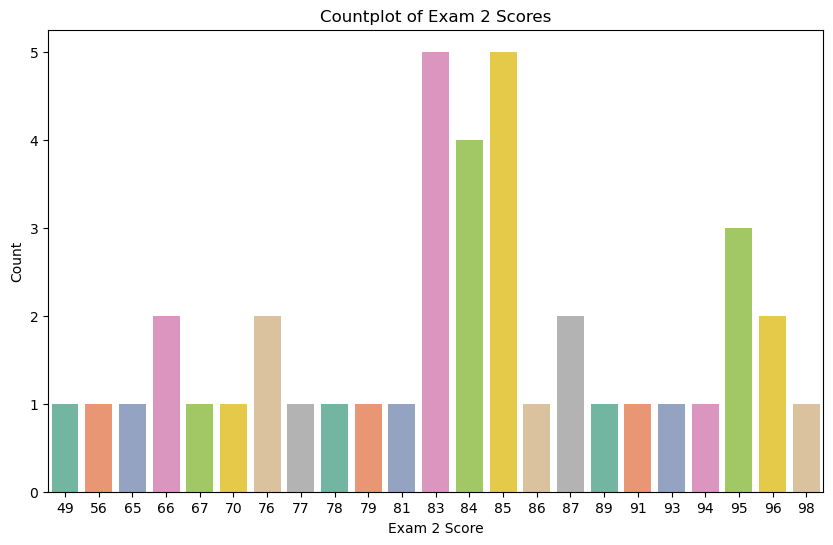

In [22]:
plt.figure(figsize=(10, 6))  # Optional, setting the figure size
sns.countplot(x="Exam2", data=data, palette="Set2")  # You can change the color palette if needed
plt.title("Countplot of Exam 2 Scores")
plt.xlabel("Exam 2 Score")
plt.ylabel("Count")
plt.show()